In [1]:
token= "90c11c3427d32b9170daa73f5fffe26dc68634b8b6f0d8e5a83082726bd42c2d384e16c5ea3f3ed03f5cb71156de8fb4ba9b3880f9f990c6ed2d275f315de5d3"
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum",
  overwrite=True
)

In [2]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [ ]:
service = QiskitRuntimeService()
n_qubits = 5
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
circuit.measure_all()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

sampler = Sampler(backend)
job = sampler.run([isa_circuit])
result = job.result()

# Get results for the first (and only) PUB
pub_result = result[0]


In [ ]:
print(f" > First ten results: {pub_result.data.meas.get_bitstrings()[:10]}")

In [4]:
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [5]:
import numpy as np

In [6]:

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print("Selected backend:", backend)

Selected backend: <IBMBackend('ibm_sherbrooke')>


## Runtime Example

In [6]:
op_str = ''  # Initialize an empty output string
num_qbits = 5  # Define number of qubits

# Calculate the number of chunks needed
num_chunks = math.ceil(str_len / num_qbits)
for _ in range(num_chunks):
    # Create a quantum register and classical register
    q = QuantumRegister(num_qbits)
    c = ClassicalRegister(num_qbits)
    QC = QuantumCircuit(q, c)

    # Apply Hadamard gates to all qubits to create superposition
    for i in range(num_qbits):
        QC.h(q[i])
    QC.measure(q, c)
    

IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'

# Implementation

## Random number generator

In [7]:
sampler = Sampler(mode=backend)

In [8]:
def RandomString(str_len, backend):
    op_str = ''  # Initialize an empty output string
    num_qbits = 10  # Define number of qubits

    # Calculate the number of chunks needed
    num_chunks = math.ceil(str_len / num_qbits)
    print(num_chunks)
    # Loop through each chunk to generate the string
    for _ in range(num_chunks):
        # Create a quantum register and classical register
        q = QuantumRegister(num_qbits)
        c = ClassicalRegister(num_qbits)
        QC = QuantumCircuit(q, c)
        
        # Apply Hadamard gates to all qubits to create superposition
        for i in range(num_qbits):
            QC.h(q[i])
        
        QC.measure(q, c)  # Measure qubits into classical bits
        
        # Transpile the quantum circuit for the selected backend
        transpiled_circuit = transpile(QC, backend)
        QC.draw()
        # Run the quantum circuit using the Sampler
        sampler = SamplerV2(backend)
        sampler.options.update(default_shots=1)
        job = sampler.run([transpiled_circuit], shots=1)
        print(f"Job ID: {job.job_id()}")
        
        # Get the result from the quantum job
        result = job.result()
        data = result[0].data
        
        # Dynamically get the first (or any) key in the data dictionary
        bitarray = next(iter(data.values()))  # Get the BitArray object
        counts = bitarray.get_counts()  # Call get_counts() on the BitArray        
        # Extract the bitstring (the first key in the dictionary)
        first_bitstring = next(iter(counts.keys()))  # This will give the first key (bitstring)
        op_str += first_bitstring  # Add the bitstring to the output string
    
    return op_str[:str_len]  # Return the full random string (trim to the requested length)

## Initialize Qiskit Runtime Service

### Function check

In [17]:
#str_len = 15
#random_key = RandomString(str_len, backend)
#print("Generated Random String:", random_key)

## Get Alice key,Bases

In [9]:
# Get the message
message = input('Enter a short message (default message is "Hello World"): ')
if len(message) < 1:
    message = 'Hello'
print('Message to be sent:', message)

# Define key length (for demo, use a shorter length)
len_message = len(message) * 2
print("Length of the encryption key: ", len_message)



Enter a short message (default message is "Hello World"):  


Message to be sent: Hello
Length of the encryption key:  10


In [18]:
def get_random_string_from_job(job_id, backend, str_len):
    job = service.job(job_id)
    result = job.result()
    op_str = ""
    data = result[0].data  # Get the data from the result
    # Loop through the data dictionary to extract the first (or any) bitstring
    bitarray = next(iter(data.values()))  # Get the BitArray object
    counts = bitarray.get_counts()  # Get the counts of bitstrings
    
    # Extract the first bitstring from the counts dictionary
    first_bitstring = next(iter(counts.keys()))  # This will give the first key (bitstring)
    
    # Add the bitstring to the output string
    op_str += first_bitstring
    return op_str[:str_len]


In [21]:
alice_key = get_random_string_from_job("cxa3b5wbqkhg00892a6g",backend,10)
alice_bases = get_random_string_from_job("cxa3awvpx23g008bxc10",backend,10)
bob_bases = get_random_string_from_job("cxa3ak2ztp30008g42qg",backend,10)

In [22]:
print('Alice Key:', alice_key)
print('Alice Bases:', alice_bases)
print('Bob Bases:', bob_bases)

Alice Key: 1110101011
Alice Bases: 1010110011
Bob Bases: 1101110001


In [17]:
op_str

'1110101011'

In [ ]:
# Step 1: Generate Alice's key and bases
#alice_key = RandomString(len_message, backend)
#alice_bases = RandomString(len_message, backend)
print('Alice Key:', alice_key)
print('Alice Bases:', alice_bases)

In [23]:
# Create quantum circuit
q = QuantumRegister(len_message)
c = ClassicalRegister(len_message)
qc = QuantumCircuit(q, c)

# Alice encodes qubits based on her key and basis
for i in range(len_message):
    if alice_key[i] == '1':
        qc.x(q[i])  # Flip the qubit to 1 if key is 1
    if alice_bases[i] == '1':
        qc.h(q[i])  # Apply Hadamard gate if basis is 1
qc.barrier()  # Barrier for visual separation

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=10, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(10, 'q4'), 0), Qubit(QuantumRegister(10, 'q4'), 1), Qubit(QuantumRegister(10, 'q4'), 2), Qubit(QuantumRegister(10, 'q4'), 3), Qubit(QuantumRegister(10, 'q4'), 4), Qubit(QuantumRegister(10, 'q4'), 5), Qubit(QuantumRegister(10, 'q4'), 6), Qubit(QuantumRegister(10, 'q4'), 7), Qubit(QuantumRegister(10, 'q4'), 8), Qubit(QuantumRegister(10, 'q4'), 9)), clbits=())

In [ ]:

# Step 2: Bob's random basis selection
#bob_bases = RandomString(len_message, backend)  # Bob generates random bases
print('Bob Bases:', bob_bases)


In [24]:
# Step 3: Bob measures the qubits
for i in range(len_message):
    if bob_bases[i] == '1':
        qc.h(q[i])  # Bob applies Hadamard if measuring in Hadamard basis

# Add measurements
qc.measure(q, c)

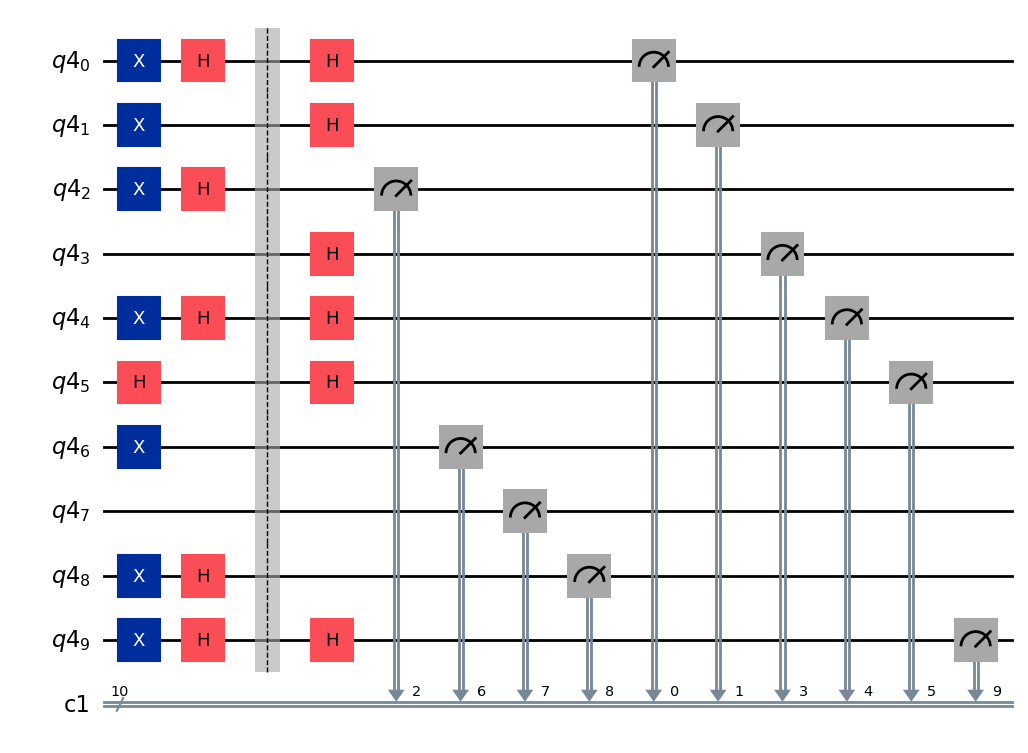

In [26]:
qc.draw('mpl')

In [ ]:
transpiled_circuit = transpile(qc, backend)
# Run the quantum circuit using the Sampler
sampler = SamplerV2(backend)
sampler.options.update(default_shots=1)
job = sampler.run([transpiled_circuit], shots=1)
print(f"Job ID: {job.job_id()}")

# Get the result from the quantum job
result = job.result()
data = result[0].data

# Dynamically get the first (or any) key in the data dictionary
bitarray = next(iter(data.values()))  # Get the BitArray object
counts = bitarray.get_counts()  # Call get_counts() on the BitArray        
# Extract the bitstring (the first key in the dictionary)
data = next(iter(counts.keys()))  # This will give the first key (bitstring)


Job ID: cxa68tkpjw30008h5sq0


In [ ]:
# Step 4: Bob's measurement results
print("Measurement results:", data)


In [ ]:
qc.draw()

In [ ]:
# Step 4: Optimization and execution using Qiskit Runtime and Sampler
# Select the backend (you can use a real quantum device or a simulator)
backend = service.least_busy(simulator=False, operational=True)

# Optimize the circuit for the selected backend
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
optimized_circuit = pm.run(qc)
print("Using backend:", backend)

In [ ]:
# Step 3: Bob measures the qubits
for i in range(len_message):
    if bob_bases[i] == '1':
        qc.h(q[i])  # Bob applies Hadamard if measuring in Hadamard basis

# Add measurements
qc.measure(q, c)

In [ ]:
# Use the SamplerV2 primitive to run the optimized circuit
sampler = Sampler(mode=backend)

# Run the sampler to get the result of the measurements
job = sampler.run([optimized_circuit],shots=1)  # Empty list for non-parametric circuit
print(f">>> Job ID: {job.job_id()}")

# Wait for the job to complete and fetch the results
result = job.result()

In [19]:
print(result[0].data.c19.get_counts())

NameError: name 'result' is not defined

In [158]:
bit_strings = result[0].data.c19.get_counts()  # Get the counts of measured bit strings
shared_key = []

# Go through each bit string and match the bases
for bit_string, count in bit_strings.items():
    # Iterate through each position and check if Alice's and Bob's bases match
    for i in range(len_message):
        if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
            # Append the corresponding bit from the bit string
            shared_key.append(bit_string[len_message - i - 1])  # Reverse the order in Qiskit

# Final shared key as a string
final_shared_key = ''.join(shared_key)
print('Final Shared Key:', final_shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100
print("Percentage of key bits retained: ", percentage_retained, "%")

Final Shared Key: 1101111111
Percentage of key bits retained:  100.0 %


## Results

In [84]:
pub_result = result[0].data['c15'].get_counts()
print(f"Pub Result Counts for 'c15': {pub_result}")

# Convert counts to list of possible outcomes (bit strings)
bit_strings = list(pub_result.keys())

# Initialize shared key list
shared_key = []

# Process each bit string based on Alice's and Bob's bases
for i in range(len_message):
    if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
        # Retrieve the corresponding bit from the measurement outcome (consider reversed order)
        outcome = bit_strings[0]  # Assuming the most frequent outcome, use a different method if needed
        shared_key.append(outcome[len_message - i - 1])  # Reverse the order in Qiskit

# Final shared key as a string
final_shared_key = ''.join(shared_key)
print('Final Shared Key:', final_shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100
print("Percentage of key bits retained: ", percentage_retained, "%")

Pub Result Counts for 'c15': {'11111': 3752, '11011': 62, '01111': 69, '11110': 57, '10111': 62, '11101': 83, '00111': 2, '01101': 3, '11001': 2, '11010': 1, '10101': 2, '11100': 1}
Final Shared Key: 11111
Percentage of key bits retained:  100.0 %


In [78]:
# Access classical registers used in the circuit
classical_registers = optimized_circuit.cregs
print(f"Classical Registers: {classical_registers}")

Classical Registers: [ClassicalRegister(5, 'c15')]


In [97]:
pub_result = result[0]

In [104]:
measured_data = result[0].data.c16
print('Measured Data (Raw BitArray):', measured_data)

Measured Data (Raw BitArray): BitArray(<shape=(), num_shots=4096, num_bits=6>)


In [107]:
measured_data = result[0].data['c16']  # Assuming 'c16' is the classical register for measurements
print('Measured Data (Raw BitArray):', measured_data)

Measured Data (Raw BitArray): BitArray(<shape=(), num_shots=4096, num_bits=6>)


In [109]:
bit_strings = measured_data.bin() # You can also use .hex() for hexadecimal representation

AttributeError: 'BitArray' object has no attribute 'bin'

In [ ]:
# Process the result and extract the shared key
shared_key = []
for i in range(len_message):
    if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
        shared_key.append(bob_result[len_message - i - 1])  # Reverse order in Qiskit

final_shared_key = ''.join(shared_key)
print('Final Shared Key:', final_shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100
print("Percentage of key bits retained: ", percentage_retained, "%")

AttributeError: 'DataBin' object has no attribute 'meas'

### Optimisization

In [7]:
qc= QuantumCircuit(2)

NameError: name 'QuantumCircuit' is not defined

In [83]:
counts = result[0].data.meas.get_counts()
print("Measured Counts:", counts)

AttributeError: 'DataBin' object has no attribute 'meas'